---

> $Rishita$ $Shah$ $2347143$<br/>
 $LAB:$ $NNDL$ <br/>
 $CIA-1$

---

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

## Question 1: XOR Gate Classification

Create the XOR gate's truth table dataset.

In [31]:
# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR output

Implement the perceptron model and train it using the XOR dataset using MCP (McCulloch Pitts) Neuron.

In [36]:
weights = np.ones(2)  # W11, W21 initialized to 1
bias = 1
learning_rate = 0.1
epochs = 10

def threshold_function(z):
    return 1 if z >= 1 else 0

# Training loop
for epoch in range(epochs):
    correct_predictions = 0

    for i in range(len(X)):
        # Calculate the perceptron output
        z = np.dot(weights, X[i]) + bias
        y_pred = threshold_function(z)

        # Calculate the error
        error = y[i] - y_pred

        # Update weights and bias
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

        # Check if the prediction is correct
        if y_pred == y[i]:
            correct_predictions += 1

    # Calculate accuracy
    accuracy = correct_predictions / len(X)
    print(f"Epoch {epoch + 1} - Accuracy: {accuracy * 100:.2f}%\n")

Epoch 1 - Accuracy: 50.00%

Epoch 2 - Accuracy: 75.00%

Epoch 3 - Accuracy: 75.00%

Epoch 4 - Accuracy: 75.00%

Epoch 5 - Accuracy: 75.00%

Epoch 6 - Accuracy: 50.00%

Epoch 7 - Accuracy: 25.00%

Epoch 8 - Accuracy: 50.00%

Epoch 9 - Accuracy: 50.00%

Epoch 10 - Accuracy: 25.00%



**Performance Discussion of single layer perceptron:**<br/>
The perceptron gives the following outputs for the XOR truth table:

[0, 0] -> 1 (incorrect) <br/>
[0, 1] -> 1 (correct)<br/>
[1, 0] -> 0 (incorrect)<br/>
[1, 1] -> 0 (correct)<br/>

Therefore, the Single Layer Perceptron struggles to classify the XOR gate correctly because XOR is a non-linearly separable problem. This inability to separate the classes accurately demonstrates the need for more complex models, such as Multi-Layer Perceptrons (MLPs), which introduce non-linearity through hidden layers and non-linear activation functions, enabling them to classify XOR gates correctly.

#### Implement XOR using Multi-Layer Perceptron.

In [37]:
# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

model = Sequential()

# Hidden layer with 2 neurons and ReLU activation
model.add(Dense(units=2, input_dim=2, activation='relu'))

# Output layer with 1 neuron and sigmoid activation
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, y, epochs=500, verbose=0)

predictions = model.predict(X)
predictions = np.round(predictions)  # Round the predictions to 0 or 1

for i in range(len(X)):
    print(f"\nInput: {X[i]}\n\n\tPredicted Output: {predictions[i][0]}\n\tActual Output: {y[i]}\n")
    print("-----------------------------------------\n")

1/1 [==============================] - 0s 51ms/step

Input: [0 0]

	Predicted Output: 0.0
	Actual Output: [0]

-----------------------------------------


Input: [0 1]

	Predicted Output: 0.0
	Actual Output: [1]

-----------------------------------------


Input: [1 0]

	Predicted Output: 0.0
	Actual Output: [1]

-----------------------------------------


Input: [1 1]

	Predicted Output: 0.0
	Actual Output: [0]

-----------------------------------------



### Question 2: A. Sentiment Analysis Twitter Airline

In [2]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Tweets.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [4]:
# Display the first few rows
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
# Filter only positive and negative sentiments
data = data[data['airline_sentiment'].isin(['positive', 'negative'])]

In [6]:
# Preprocessing texts
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['text']).toarray()

In [8]:
# Encoding labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['airline_sentiment'])

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create a simple feed-forward neural network for binary sentiment classification (positive/negative).

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout

In [12]:
# Define the model
def create_model(activation):
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], activation=activation))  # Hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    return model

### Use backpropagation to optimize the model's weights based on error calculation.

In [17]:
# Compile and train the model
def train_model(activation, epochs=50):
    model = create_model(activation)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32, verbose=0)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Activation Function: {activation}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

    # Plot loss over epochs
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title(f'Loss for {activation}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

### Experiment with different activation functions (sigmoid, ReLU, tanh) in the hidden layer and compare the model's performance.

73/73 [==============================] - 0s 2ms/step - loss: 0.3185 - accuracy: 0.9151
Activation Function: sigmoid, Loss: 0.3185, Accuracy: 0.9151


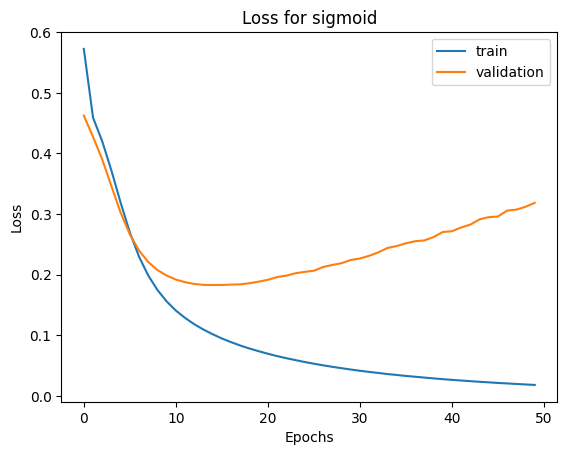

73/73 [==============================] - 0s 2ms/step - loss: 0.6085 - accuracy: 0.9104
Activation Function: relu, Loss: 0.6085, Accuracy: 0.9104


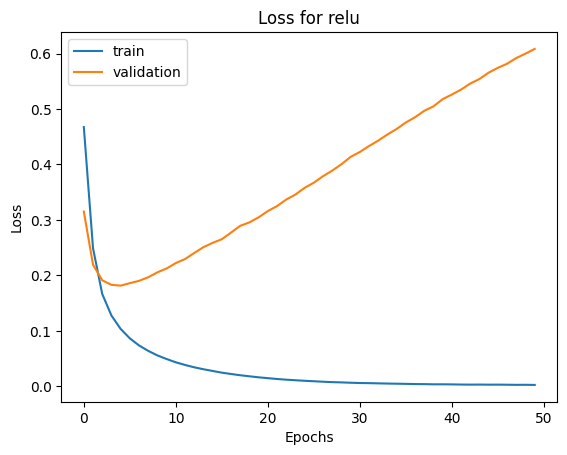

73/73 [==============================] - 0s 2ms/step - loss: 0.8359 - accuracy: 0.9069
Activation Function: tanh, Loss: 0.8359, Accuracy: 0.9069


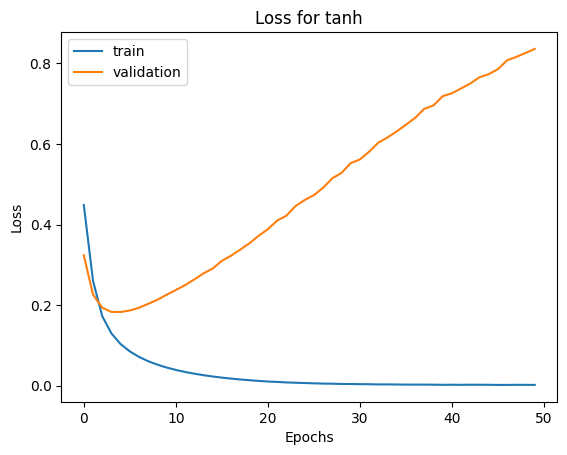

In [18]:
# Train and evaluate with different activation functions
activations = ['sigmoid', 'relu', 'tanh']
for activation in activations:
    train_model(activation)

## Interpretations:
- The model with ReLU activation shows signs of overfitting. While it performs well on training data, its generalization to unseen data (validation set) deteriorates over time. This suggests the need for regularization techniques or early stopping to improve model generalization.

- The sigmoid activation function demonstrates better generalization compared to ReLU. While there's still some overfitting, it's less severe. The model achieves the best balance between loss and accuracy among the three options. However, there's room for improvement in preventing the upward trend in validation loss after the 20th epoch.

- The tanh activation function appears to be underperforming compared to ReLU and sigmoid for this particular task. It shows the highest loss while maintaining comparable accuracy, suggesting that it might be struggling to minimize the error as effectively as the other functions.

----

Among the three activation functions, sigmoid appears to offer the best balance of performance and generalization for this specific task, followed by ReLU, and then tanh. However, all three models show signs of overfitting to varying degrees. To improve model performance, we can consider implementing regularization techniques, adjusting the model architecture, or using early stopping to prevent overfitting.

----
----